#### 통계적 추정
- 점추정
    - 모평균이나 모분산 등의 모수를 하나의 수치로 추정
    - 추정량의 기댓값이 추측하려는 모수가 되는 성질을 불편성이라고 하며 불편성을 가진 추정량을 불편추정량이라고 한다.
    - 표본평균이 모평균을 잘 추정할 수 있는 근거 중 하나가 바로 이 불편성이다.
    - 표본크기 n을 증가시키면 추측하기 원하는 모수에 수렴해 가는 성질을 일치성이라고 하며 일치성을 지닌 추정량을 일치 추정량이라고 함
    - 표본평균은 불편성과 일치성을 모두 가지고 있기 때문에 모평균을 잘 추정한다고 할 수 있다.
    - 모분산의 불편 추정량이 되는 표본통계량은 불편분산이다.
    - 불편분산은 표본분산에서 나누는 수 n-1로 하는 식으로 계산되며 표본분산은 $S^2$으로 나타내지만 불편분산은 $s^2$으로 나타낸다.
    
- 구간추정
    - 모분산을 알고 있는 경우의 모평균 구간추정
    - 모분산을 알고 있는 경우의 모분산 구간추정
    - 모분산을 알지 못하는 경우의 모평균 구간추정
    - 베르누이 분포의 모평균의 구간추정
    - 포아송 분포의 모평균의 구간추정

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
# [과제] 모평균과 모분산의 점추정 사례를 파이썬 코드로 수행하세요.
df = pd.read_csv('./data/ch4_scores400.csv')
scores = np.array(df.score)
samples = np.random.choice(scores,(1000,10000))
scores_mean = np.zeros(10000)
for i in range(10000):
    scores_mean[i] = samples[:,i].mean()
print('평균의 불편추정량 :',scores_mean.mean(),'\n')
samples = np.random.choice(scores,10000000)
print('평균의 일치추정량 :',samples.mean())

평균의 불편추정량 : 69.5335979 

평균의 일치추정량 : 69.5294971


In [4]:
samples = np.random.choice(scores,(1000,10000))
scores_var = np.zeros(10000)
for i in range(10000):
    scores_var[i] = samples[:,i].var(ddof=1)
print('분산의 불편추정량 :',scores_var.mean(),'\n')
samples = np.random.choice(scores,10000000)
print('분산의 일치추정량 :',samples.var())

분산의 불편추정량 : 206.69598612392394 

분산의 일치추정량 : 206.77953964201387


모분산을 모르는 경우
- $\sqrt{\sigma^2/n}$ 대신 불편표준편차의 $\sqrt{s^2/n}$를 표준오차로 사용한다.
- 표준화 과정에서 다음의 식이 사용되는데, 이것은 t분포를 따른다. (카이제곱분포 Y 이용하여 구함)  
$t = $ $Z \over \sqrt{Y/(n-1)}$
- 이 때, $\alpha$ 신뢰구간은 다음과 같다.  
$[\bar{X}-t_{\alpha/2}(n-1)\sqrt{s^2/n}, \bar{X}-t_{1-\alpha/2}(n-1)\sqrt{s^2/n}]$


In [5]:
# [과제] 모분산을 알지 못할 때 정규 분포의 모평균의 구간 추정을 파이썬 코드로 수행하세요.
n = 20
sample = np.random.choice(scores, n)
s_mean = np.mean(sample)
u_var = np.var(sample, ddof=1)

rv = stats.t(df=n-1)
lcl = s_mean - rv.isf(0.025) * np.sqrt(u_var/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(u_var/n)

lcl, ucl

(59.771149312217716, 69.12885068778229)

In [6]:
# [과제] 모집단에 정규분포를 가정할 수 없는 예를 포아송 분포로 설정하여 모평균 신뢰구간을 구하세요.
n_access_df = pd.read_csv('./data/ch10_access.csv')
n_access = np.array(n_access_df['access number'])

s_mean = n_access.mean()

rv = stats.norm()
lcl = s_mean - rv.isf(0.025) * np.sqrt(s_mean/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(s_mean/n)

lcl, ucl

(9.028077556269617, 11.86081133261927)

#### 통계적 가설검정

In [7]:
# [과제] A학생의 사례로 가설검정 프로세스를 정리하세요.

# 귀무가설 : 감자튀김의 평균무게는 130g이다.
# 대립가설 : 감자튀김의 평균무게는 130g보다 작다.
# 유의 수준은 5%로 설정
df = pd.read_csv('./data/ch11_potato.csv')
sample = np.array(df.무게)
s_mean = sample.mean()
# 검정통계량 : A가 산 감자튀김 14개의 평균 무게 = 128.451g
print(s_mean,'\n')
# 임계값 구하기
rv = stats.norm(130, np.sqrt(9/14))
print(rv.isf(0.95),'\n')
# 검정통계량이 임계값보다 작기때문에 귀무가설은 기각된다.


# 일반적으로는 표준화하여 검정을 수행
# 표준화 하여 검정통계량과 임계값의 비교

# 표준화 된 검정 통계량 값
z = (s_mean-130)/np.sqrt(9/14)
print(z,'\n')
# 임계값
rv = stats.norm()
print(rv.isf(0.95) , '\n')
# 검정통계량이 임계값보다 작으므로 귀무가설은 기각

# p값을 활용하여 가설검정

print(rv.cdf(z))
# 유의수준인 0.05보다 작으므로 귀무가설 기각

# 따라서 모평균은 130g보다 작다.

128.4507142857143 

128.68118313069039 

-1.932298779026813 

-1.6448536269514722 

0.026661319523126635


Text(0, 0.5, 'cdf')

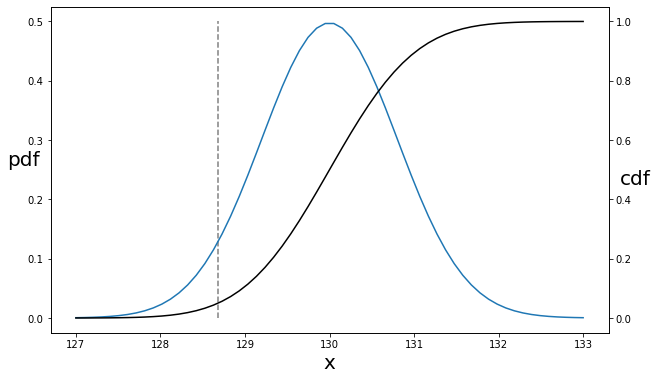

In [8]:
x_s = np.linspace(rv.isf(0.001),rv.isf(0.999),100)
fig = plt.figure(figsize=(10,6))
rv = stats.norm(130, np.sqrt(9/14))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
xs = np.linspace(127,133,60)
ax1.plot(xs , rv.pdf(xs))
ax2.plot(xs, rv.cdf(xs),color='black')
ax1.vlines(rv.ppf(0.05),0,0.5,color='gray',ls='--')
ax1.set_xlabel('x',fontsize=20)
ax1.set_ylabel('pdf',rotation=0,fontsize=20)
ax2.set_ylabel('cdf',rotation=0,fontsize=20)

In [9]:
# 양측검정
z = (s_mean-130)/np.sqrt(9/14)
z

-1.932298779026813

In [10]:
rv = stats.norm()
rv.interval(0.95)

(-1.959963984540054, 1.959963984540054)

In [11]:
# 양측검정의 p값은 상단과 하단의 양쪽 면적을 고려해야 하므로 누적밀도함수의 2배로 한다.
# p값이 0.05보다 크므로 귀무가설을 채택 : '감자튀김의 무게는 130g이 아니다'라고 할수없다.
rv.cdf(z)*2

0.05332263904625327

#### 가설검정에서의 두가지 오류
- 제 1종 오류 : 귀무가설이 옳을 때, 귀무가설을 기각하는 오류
    - 실제로 평균이 130g인데도 '평균은 130g보다 작다'라는 결론을 내리는 상황
- 제 2종 오류 : 대립가설이 옳을 때, 귀무가설을 채택하는 오류
    - 모평균이 130g보다 작다인데도 '모평균은 130g 보다 작다'라는 결론을 얻을 수 없는 비율
- 통계적 가설검정에서는 제 1종 오류는 제어할 수 있지만 제 2종 오류는 제어할 수 없는 비대칭성이 있다.

In [12]:
# 제 1종 오류를 범할 비율 : 위험률=유의수준(𝛼), 분석가가 제어할 수 있는 확률
np.random.seed(10)
c = stats.norm().isf(0.95)
n_samples = 10000
cnt = 0 
rv = stats.norm(130,np.sqrt(9))
for _ in range(n_samples):
    sample_ = np.round(rv.rvs(14),2)
    s_mean_ = np.mean(sample_)
    z = (s_mean_ - 130)/np.sqrt(9/14)
    if z<c:
        cnt+=1
cnt/n_samples

0.0522

In [13]:
# 제 2종 오류를 범하는 비율 : 1-𝛽 , 검정력, 분석가가 제어할 수 없는 확률
# [과제] 감자튀김 사례로 2종 오류를 범하는 비율을 구하세요.
rv = stats.norm(128, 3)
c = stats.norm().isf(0.95)
n_samples = 10000
cnt = 0
for _ in range(n_samples):
    sample_ = np.round(rv.rvs(14), 2)
    s_mean_ = np.mean(sample_)
    z = (s_mean_ - 130) / np.sqrt(9/14)
    if z >= c:
        cnt += 1
        
cnt / n_samples

0.2015

정규분포의 모평균에 대한 검정(모분산을 알고 있는 경우)

In [14]:
# [과제] 모평균에 대한 검정을 사용자 함수 pmean_test()를 작성하여 감자튀김 사례에 대하여 양측검정을 수행하세요.
def pmean_test(sample, mean0, p_var, alpha=0.05):
    s_mean = np.mean(sample)
    n = len(sample)
    rv = stats.norm()
    interval = rv.interval(1-alpha)

    z = (s_mean - mean0) / np.sqrt(p_var/n)
    if interval[0] <= z <= interval[1]:
        print('귀무가설을 채택')
    else:
        print('귀무가설을 기각')

    if z < 0:
        p = rv.cdf(z) * 2
    else:
        p = (1 - rv.cdf(z)) * 2
    print(f'p값은 {p:.3f}')

In [15]:
pmean_test(sample, 130, 9)

귀무가설을 채택
p값은 0.053


In [16]:
# 정규분포의 모분산에 대한 검정
def pvar_test(sample, var0, alpha=0.05):
    u_var = np.var(sample, ddof=1)
    n = len(sample)
    rv = stats.chi2(df=n-1)
    interval = rv.interval(1-alpha)
    
    y = (n-1) * u_var / var0 # 검정통계량
    if interval[0] <= y <= interval[1]:
        print('귀무가설을 채택')
    else:
        print('귀무가설을 기각')

    if y < rv.isf(0.5):
        p = rv.cdf(y) * 2
    else:
        p = (1 - rv.cdf(y)) * 2
    print(f'p값은 {p:.3f}')

In [17]:
pvar_test(sample, 9)

귀무가설을 채택
p값은 0.085


정규 분포의 모평균에 대한 검정(모분산을 알지 못함)

In [18]:
def pmean_test(sample, mean0, alpha=0.05):
    s_mean = np.mean(sample)
    u_var = np.var(sample, ddof=1)
    n = len(sample)
    rv = stats.t(df=n-1)
    interval = rv.interval(1-alpha)

    t = (s_mean - mean0) / np.sqrt(u_var/n)
    if interval[0] <= t <= interval[1]:
        print('귀무가설을 채택')
    else:
        print('귀무가설을 기각')

    if t < 0:
        p = rv.cdf(t) * 2
    else:
        p = (1 - rv.cdf(t)) * 2
    print(f'p값은 {p:.3f}')

In [19]:
pmean_test(sample, 130)

귀무가설을 채택
p값은 0.169


[과제] 대응표본, 독립표본에 대하여 정규분포를 가정하는 경우와 가정할 수 없는 경우의 4가지 사례를 작성하세요.

정규분포를 가정  
대응표본 t 검정 ex) 백신 투약 전후의 위증증 데이터  
독립표본 t 검정 ex) A, B 두 반의 시험성적 데이터  

정규분포를 가정할 수 없는 경우  
대응표본 - 월콕슨의 부호순위검정 ex) 학원에 다닌 전후의 성적 순위 상승 데이터  
독립표본 - 만 위트니의 U검정 ex) A반 남,녀에 따른 성적순위 데이터

In [20]:
# 대응표본 t검정
data = pd.read_csv('./data/ch11_training_rel.csv')
print(data.shape)
data.head()

(20, 2)


전   후
0  59  41
1  52  63
2  55  68
3  61  59
4  59  84

In [21]:
data['차'] = data['후'] - data['전']
data.head()

전   후   차
0  59  41 -18
1  52  63  11
2  55  68  13
3  61  59  -2
4  59  84  25

In [22]:
# 유의수준 0.05보다 작으므로 귀무가설 기각하며 '근력운동은 집중력에 유의미한 차이를 가져온다' 라고 할 수 있다.
t, p = stats.ttest_1samp(data['차'], 0)
p

0.04004419061842953

In [23]:
# 독립표본 r검정
data = pd.read_csv('./data/ch11_training_ind.csv')
data.head()

A   B
0  47  49
1  50  52
2  37  54
3  60  48
4  39  51

In [24]:
# p값이 0.05보다 크므로 귀무가설이 채택 'A,B반 사이에는 평균점수에 유의한 차이가 있다고 말할 수 없다'
t, p = stats.ttest_ind(data['A'], data['B'],
                       equal_var=False)
p

0.08695731107259361

In [25]:
# [과제] 정규분포를 가정할 수 없는 경우 대응표본에 대한 가설검정을 수행하세요
data = pd.read_csv('./data/ch11_training_rel.csv')
data1 = data[:6].copy()
display(data1)
T, p = stats.wilcoxon(data1.전, data1.후)
p

전   후
0  59  41
1  52  63
2  55  68
3  61  59
4  59  84
5  45  37

0.6875

In [26]:
# [과제] 정규분포를 가정할 수 없는 경우 독립표본에 대한 가설검정을 수행하세요
data = pd.read_csv('./data/ch11_training_ind.csv')
data2 = data[:5].copy()
display(data2)
u, p =stats.mannwhitneyu(data2.A,data2.B,alternative='two-sided')
p

A   B
0  47  49
1  50  52
2  37  54
3  60  48
4  39  51

0.30952380952380953

[과제] 독립성 검정이 필요한 사례 2가지를 작성하세요.

In [27]:
df = pd.read_csv('./data/ch11_ad.csv')
n = len(df)
print(len(df))
df.head()

1000


광고      구입
0  B  하지 않았다
1  B  하지 않았다
2  A      했다
3  A      했다
4  B  하지 않았다

In [28]:
# 교차 집계표
ad_cross = pd.crosstab(df.광고, df.구입)
ad_cross

구입  하지 않았다  했다
광고            
A      351  49
B      549  51

In [29]:
# p값이 0.05보다 크므로 귀무가설을 채택 '광고 A와 광고 B에 유의한 차이가 인정되지 않는다'
chi2, p, dof, ef = stats.chi2_contingency(ad_cross,correction=False)
chi2, p, dof

(3.75, 0.052807511416113395, 1)

In [30]:
# [과제] 기대도수와 관측도수(실측)의 차이를 측정해서 검정 수행

n_not, n_yes = ad_cross.sum()
n_adA, n_adB = ad_cross.sum(axis=1)

In [31]:
df = pd.read_csv('./data/ch11_ad.csv')
n = len(df)

n_not, n_yes = ad_cross.sum()
n_adA, n_adB = ad_cross.sum(axis=1)

ad_ef = pd.DataFrame({'했다': [n_adA * n_yes / n,
                              n_adB * n_yes / n],
                      '하지 않았다': [n_adA * n_not / n,
                                   n_adB * n_not / n]},
                      index=['A', 'B'])

ad_ef

했다  하지 않았다
A  40.0   360.0
B  60.0   540.0

In [32]:
y = ((ad_cross - ad_ef) ** 2 / ad_ef).sum().sum()
rv = stats.chi2(1)
1 - rv.cdf(y)

0.052807511416113395